In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree,metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

We have added more time features to see if we improve the accuracy

In [2]:
data = pd.read_excel('Case1_data.xlsx')
data=data.drop(columns=['FlightNumber'])
is_NaN = data.isnull();row_has_NaN = is_NaN.any(axis=1);rows_with_NaN = data[row_has_NaN]
data = data.drop(list(rows_with_NaN.index))
data=data.reset_index()
data.AircraftType=data.AircraftType.astype('str')

def apply_OneHotEncoder(data_col):
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(data_col).toarray())
    d={}
    for i in range (0,len(np.unique(data_col))):
        d[i]=enc.categories_[0][i]
    enc_df=enc_df.rename(columns=d)
    return enc_df

DateTime_dic = {'Month':[],'Year':[],'Hour':[],'Minute':[],'Day_Of_Year':[],'Day_Of_Week':[],
               'Is_month_end':[],'Is_month_start':[],'Quarter_end':[],'Quarter_start':[],'Year_end':[],
               'Year_Start':[],'Quarter':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute);
    DateTime_dic['Day_Of_Year'].append(a.dayofyear);DateTime_dic['Day_Of_Week'].append(a.dayofweek);
    DateTime_dic['Is_month_end'].append(int(a.is_month_end));
    DateTime_dic['Is_month_start'].append(int(a.is_month_start));
    DateTime_dic['Quarter_end'].append(int(a.is_quarter_end));
    DateTime_dic['Quarter_start'].append(int(a.is_quarter_start));
    DateTime_dic['Year_end'].append(int(a.is_year_end));DateTime_dic['Year_Start'].append(int(a.is_year_start));
    DateTime_dic['Quarter'].append(a.quarter)
    
pd_time=pd.DataFrame.from_dict(DateTime_dic)
y=np.array(data.LoadFactor)
data=data.drop(columns='LoadFactor')

df = pd.concat([apply_OneHotEncoder(data[['Airline']]),apply_OneHotEncoder(data[['Destination']]),
                apply_OneHotEncoder(data[['AircraftType']]),apply_OneHotEncoder(data[['FlightType']]),
                apply_OneHotEncoder(data[['Sector']]),pd_time,pd.DataFrame(data.SeatCapacity)],axis=1)
                                                                          
X=np.array(df)
# NORMALIZATION
X_pre = X - np.mean(X,axis=0)
normalizer = preproc.Normalizer().fit(X_pre.T)  
X_pre = normalizer.transform(X_pre.T).T
min_max_scaler = preproc.MinMaxScaler()
y_pre = min_max_scaler.fit_transform(y.reshape(-1,1)).reshape(-1,)

In [3]:
df

,AY,BJ,BT,BZ,CL,CN,DO,DT,DU,EM,...,Day_Of_Year,Day_Of_Week,Is_month_end,Is_month_start,Quarter_end,Quarter_start,Year_end,Year_Start,Quarter,SeatCapacity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,0,1,0,1,0,1,1,142
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,0,1,0,1,0,1,1,74
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,0,1,0,1,0,1,1,142
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,4,0,1,0,1,0,1,1,72
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,0,1,0,1,0,1,1,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39,1,0,0,0,0,0,0,1,180
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39,1,0,0,0,0,0,0,1,156
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39,1,0,0,0,0,0,0,1,156
36766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,39,1,0,0,0,0,0,0,1,189


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.30, random_state=42)

In [5]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
y_pred=model.predict(X_test)

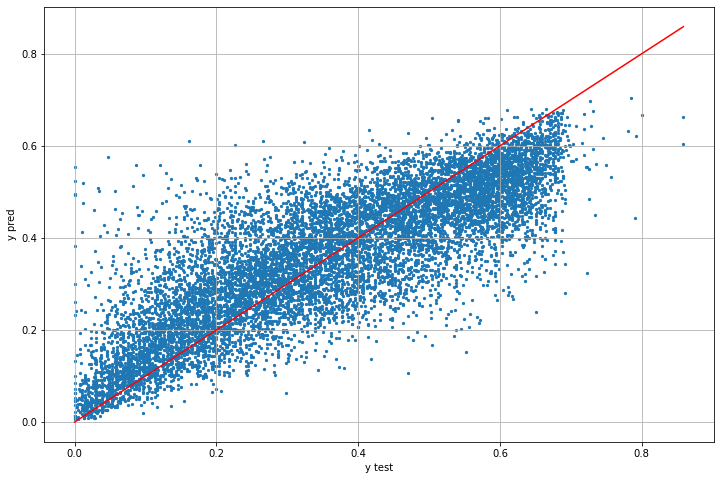

In [7]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [8]:
metrics.mean_absolute_error(y_test,y_pred)

0.08051163334460525

0.08047546486930399

Before doing one encoding to all time features: 0.08207498064062252 (mean_absolute_error)

KNN

In [17]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
pred=model.predict(X_test)

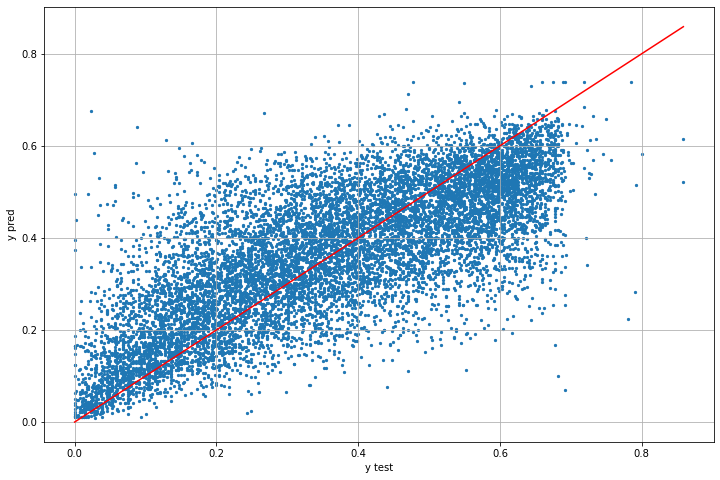

In [18]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [19]:
metrics.mean_absolute_error(y_test,pred)

0.09442357178617591

Before doing one encoding to all time features: 0.09574269766891995 (mean_absolute_error)